In [ ]:
import numpy
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
dubinsData = genfromtxt("twoCarsData.csv", delimiter=',')
additional = genfromtxt("twoCarsDataFar.csv", delimiter=',')

In [ ]:

dataP = additional[:,(0,1,2,4,5,6,3)]
dataE = additional[:,(0,1,2,4,5,6,7)]

dataE[:,-1] = dataE[:,-1].round()
dataP[:,-1] = dataP[:,-1].round()

# xe = xe - xp; ye = ye - yp, the = the - thp
dataP[:,3] = dataP[:,3] - dataP[:,0]
dataP[:,4] = dataP[:,4] - dataP[:,1]
dataP[:,5] = dataP[:,5] - dataP[:,2]

dataP[:,0] = 0
dataP[:,1] = 0

tempX = numpy.multiply(dataP[:,3], numpy.cos(dataP[:,2])) + numpy.multiply(dataP[:,4], numpy.sin(dataP[:,2]))
tempY = -numpy.multiply(dataP[:,3], numpy.sin(dataP[:,2])) + numpy.multiply(dataP[:,4], numpy.cos(dataP[:,2]))

dataP[:,3] = tempX
dataP[:,4] = tempY

dataP[:,2] = 0

dataP = dataP[:,[3,4,5,6]]

# xp = xp - xe; yp = yp - ye, thp = thp - the
dataE[:,0] = dataE[:,0] - dataE[:,3]
dataE[:,1] = dataE[:,1] - dataE[:,4]
dataE[:,2] = dataE[:,2] - dataE[:,5]

dataE[:,3] = 0
dataE[:,4] = 0

tempX = numpy.multiply(dataE[:,0], numpy.cos(dataE[:,5])) + numpy.multiply(dataE[:,1], numpy.sin(dataE[:,5]))
tempY = -numpy.multiply(dataE[:,0], numpy.sin(dataE[:,5])) + numpy.multiply(dataE[:,1], numpy.cos(dataE[:,5]))

dataE[:,0] = tempX
dataE[:,1] = tempY

dataE[:,5] = 0

dataE = dataE[:,[0,1,2,6]]

ys = dataP[:,1].reshape(1,len(dataP))[0]

temp = numpy.arange(len(ys))
a = (ys<-0.055)|(ys>0.055)
b = temp%2000==0
dataP = dataP[a | b, :]

us = dataP[:,3].reshape(1,len(dataP))[0]
c = us!=0
dataP = dataP[c,:]

ys = dataE[:,1].reshape(1,len(dataE))[0]

temp = numpy.arange(len(ys))
a = (ys<-0.055)|(ys>0.055)
b = temp%2000==0
dataE = dataE[a | b, :]

us = dataE[:,3].reshape(1,len(dataE))[0]
c = us!=0
dataE = dataE[c,:]

dataPa = dataP
dataEa = dataE

In [ ]:
dubinsData.shape

(9000, 8)

In [ ]:
dataMirrored = dubinsData

dataMirrored[:,1] = -dataMirrored[:,1]    # y = -y
dataMirrored[:,2] = -dataMirrored[:,2]    # th = -th
dataMirrored[:,3] = -dataMirrored[:,3]    # u = -u

dataMirrored[:,5] = -dataMirrored[:,5]    # y = -y
dataMirrored[:,6] = -dataMirrored[:,6]    # th = -th
dataMirrored[:,7] = -dataMirrored[:,7]    # u = -u

dubinsData = np.vstack((dubinsData,dataMirrored))

In [ ]:
dubinsData.shape

(18000, 8)

In [ ]:
dataP = dubinsData[:,(0,1,2,4,5,6,3)]
dataE = dubinsData[:,(0,1,2,4,5,6,7)]

dataE[:,-1] = dataE[:,-1].round()
dataP[:,-1] = dataP[:,-1].round()

In [ ]:
# xe = xe - xp; ye = ye - yp, the = the - thp
dataP[:,3] = dataP[:,3] - dataP[:,0]
dataP[:,4] = dataP[:,4] - dataP[:,1]
dataP[:,5] = dataP[:,5] - dataP[:,2]

dataP[:,0] = 0
dataP[:,1] = 0

tempX = numpy.multiply(dataP[:,3], numpy.cos(dataP[:,2])) + numpy.multiply(dataP[:,4], numpy.sin(dataP[:,2]))
tempY = -numpy.multiply(dataP[:,3], numpy.sin(dataP[:,2])) + numpy.multiply(dataP[:,4], numpy.cos(dataP[:,2]))

dataP[:,3] = tempX
dataP[:,4] = tempY

dataP[:,2] = 0

dataP = dataP[:,[3,4,5,6]]

dataP = np.vstack((dataP,dataPa))

In [ ]:
# xp = xp - xe; yp = yp - ye, thp = thp - the
dataE[:,0] = dataE[:,0] - dataE[:,3]
dataE[:,1] = dataE[:,1] - dataE[:,4]
dataE[:,2] = dataE[:,2] - dataE[:,5]

dataE[:,3] = 0
dataE[:,4] = 0

tempX = numpy.multiply(dataE[:,0], numpy.cos(dataE[:,5])) + numpy.multiply(dataE[:,1], numpy.sin(dataE[:,5]))
tempY = -numpy.multiply(dataE[:,0], numpy.sin(dataE[:,5])) + numpy.multiply(dataE[:,1], numpy.cos(dataE[:,5]))

dataE[:,0] = tempX
dataE[:,1] = tempY

dataE[:,5] = 0

dataE = dataE[:,[0,1,2,6]]

dataE = np.vstack((dataE,dataEa))

In [ ]:
# REMOVE STRAIGHT LINE POINTS
ys = dataP[:,1].reshape(1,len(dataP))[0]

temp = numpy.arange(len(ys))
a = (ys<-0.055)|(ys>0.055)
b = temp%1==0
dataP = dataP[a | b, :]

us = dataP[:,3].reshape(1,len(dataP))[0]
c = us!=0
dataP = dataP[c,:]

ys = dataE[:,1].reshape(1,len(dataE))[0]

temp = numpy.arange(len(ys))
a = (ys<-0.055)|(ys>0.055)
b = temp%2000==0
dataE = dataE[a | b, :]

us = dataE[:,3].reshape(1,len(dataE))[0]
c = us!=0
dataE = dataE[c,:]

In [ ]:
print(dataP.shape)
print(dataE.shape)

(3582, 4)
(5553, 4)


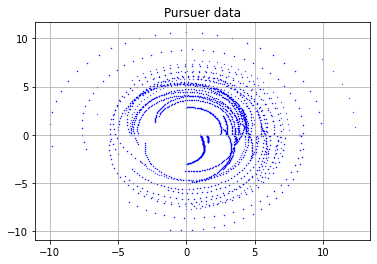

In [ ]:
plt.scatter(dataP[:,0], dataP[:,1], c ="blue", s = 0.1)
plt.grid()
axes=plt.gca()
#axes.set_aspect('equal')

axes.set(title="Pursuer data")
plt.savefig("D:\\Julia\\data\\newImages\\twoCarPursuerData.pdf",pad_inches=0.1,bbox_inches='tight')

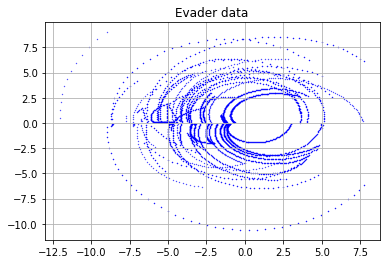

In [ ]:
plt.scatter(dataE[:,0], dataE[:,1], c ="blue", s = 0.1)
axes=plt.gca()
plt.grid()
#axes.set_aspect('equal')

axes.set(title="Evader data")
plt.savefig("D:\\Julia\\data\\newImages\\twoCarEvaderData.pdf",pad_inches=0.1,bbox_inches='tight')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Pursuer training

In [ ]:
X_p = dataP[:,[0,1,2]]
y_p = dataP[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size = 0.20)

In [ ]:
# naming the classifier Pursuer
Pursuer = RandomForestClassifier(n_estimators = 100)
Pursuer.fit(X_train, y_train)

from sklearn.tree import export_graphviz

dot_data = export_graphviz(Pursuer.estimators_[99],
                           #feature_names=wine.feature_names,
                           #class_names=wine.target_names,
                           filled=True, impurity=True,
                           rounded=True)
print(dot_data)

y_pred = Pursuer.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= -0.461\ngini = 0.481\nsamples = 1791\nvalue = [1153, 1712]", fillcolor="#bedff7"] ;
1 [label="X[2] <= 3.789\ngini = 0.313\nsamples = 430\nvalue = [131, 543]", fillcolor="#69b5eb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= -2.022\ngini = 0.23\nsamples = 397\nvalue = [83, 542]", fillcolor="#57ace9"] ;
1 -> 2 ;
3 [label="X[0] <= -3.321\ngini = 0.069\nsamples = 57\nvalue = [81, 3]", fillcolor="#e68640"] ;
2 -> 3 ;
4 [label="X[1] <= -2.859\ngini = 0.191\nsamples = 19\nvalue = [25, 3]", fillcolor="#e89051"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 15\nvalue = [22, 0]", fillcolor="#e58139"] ;
4 -> 5 ;
6 [label="X[2] <= 2.969\ngini = 0.5\nsamples = 4\nvalue = [3, 3]", fillcolor="#ffffff"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 2\nvalue = [3, 0]", fillcolor="#e58139"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples

In [ ]:
import tensorflow
# y_train=np.array(y_train)
# y_train=y_train.reshape(len(y_train),1)

# y_test=np.array(y_test)
# y_test=y_test.reshape(len(y_test),1)
# y_test.shape
y_train = tensorflow.keras.utils.to_categorical(y_train, 3)
y_test =tensorflow.keras.utils.to_categorical(y_test, 3)

In [ ]:
# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
dummy_y = y_train
dummy_y2= y_test

In [ ]:
# build a model
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(50, activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                200       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 2,903
Trainable params: 2,903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=3500,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_train, dummy_y,
                    callbacks=[es],
                    epochs=3500, # you can set this to a big number!
                    batch_size=600,
                    shuffle=True,
                    validation_split=0.4,
                    verbose=1)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 30ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 1002/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0226 - val_accuracy: 0.9948
Epoch 1003/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0225 - val_accuracy: 0.9948
Epoch 1004/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 1005/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 1006/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 1007/3500
3/3 [==============================] - 0s 26ms/step - loss: 0.0042 - accuracy: 0.9988

In [ ]:
preds = model.predict(X_test).round(decimals=0)
m=tensorflow.keras.metrics.categorical_accuracy(
    dummy_y2, preds
)
x=m.numpy()
truev=np.count_nonzero(x == 1)
# print(np.count_nonzero(x == 1))
print(len(x))
print(truev/len(x)*100)

717
99.581589958159


# Evader training

In [ ]:
X_e = dataE[:,[0,1,2]]
y_e = dataE[:,3]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_e, y_e, test_size = 0.20)
print(len(y_train),len(y_test))
y_train2

2865 717


array([ 1., -1.,  1., ...,  1., -1., -1.])

In [ ]:
# naming the classifier Evader
Evader = RandomForestClassifier(n_estimators = 100)
Evader.fit(X_train2, y_train2)

dot_data = export_graphviz(Evader.estimators_[99],
                           #feature_names=wine.feature_names,
                           #class_names=wine.target_names,
                           filled=True, impurity=True,
                           rounded=True)
print(dot_data)

y_pred = Evader.predict(X_test2)


print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test2, y_pred))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[1] <= -0.057\ngini = 0.5\nsamples = 2792\nvalue = [2190, 2252]", fillcolor="#fafcfe"] ;
1 [label="X[2] <= -4.915\ngini = 0.023\nsamples = 1356\nvalue = [25, 2124]", fillcolor="#3b9ee5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 298\nvalue = [0, 498]", fillcolor="#399de5"] ;
1 -> 2 ;
3 [label="X[0] <= 4.99\ngini = 0.03\nsamples = 1058\nvalue = [25, 1626]", fillcolor="#3c9fe5"] ;
1 -> 3 ;
4 [label="X[1] <= -0.409\ngini = 0.019\nsamples = 1044\nvalue = [16, 1610]", fillcolor="#3b9ee5"] ;
3 -> 4 ;
5 [label="X[1] <= -0.664\ngini = 0.003\nsamples = 952\nvalue = [2, 1476]", fillcolor="#399de5"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 910\nvalue = [0, 1416]", fillcolor="#399de5"] ;
5 -> 6 ;
7 [label="X[1] <= -0.651\ngini = 0.062\nsamples = 42\nvalue = [2, 60]", fillcolor="#40a0e6"] ;
5 -> 7 ;
8 [label=

In [ ]:
import tensorflow
# y_train=np.array(y_train)
# y_train=y_train.reshape(len(y_train),1)

# y_test=np.array(y_test)
# y_test=y_test.reshape(len(y_test),1)
# y_test.shape
y_train2 = tensorflow.keras.utils.to_categorical(y_train2, 3)
y_test2 =tensorflow.keras.utils.to_categorical(y_test2, 3)

In [ ]:

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X_train2 = sc2.fit_transform(X_train2)
X_test2 = sc2.transform(X_test2)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
# dummy_y=np.array(ct.fit_transform(y_train))
# dummy_y2=np.array(ct.transform(y_test))
dummy_y = y_train2
dummy_y2= y_test2

In [ ]:
y_train2.dtype

dtype('float32')

In [ ]:
dummy_y[-3]

array([0., 1., 0.], dtype=float32)

In [ ]:
# build a model
model2 = Sequential()
model2.add(Dense(50, input_shape=(X_train2.shape[1],), activation='relu')) # input shape is (features,)
model2.add(Dense(50, activation='relu')) # input shape is (features,)
model2.add(Dense(3, activation='softmax'))
model2.summary()

# compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                200       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 2,903
Trainable params: 2,903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=6000,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model2.fit(X_train2, dummy_y,
                    callbacks=[es],
                    epochs=5000, # you can set this to a big number!
                    batch_size=900,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 17ms/step - loss: 0.0347 - accuracy: 0.9764 - val_loss: 0.0246 - val_accuracy: 0.9831
Epoch 2502/5000
4/4 [==============================] - 0s 16ms/step - loss: 0.0338 - accuracy: 0.9780 - val_loss: 0.0266 - val_accuracy: 0.9786
Epoch 2503/5000
4/4 [==============================] - 0s 16ms/step - loss: 0.0346 - accuracy: 0.9772 - val_loss: 0.0247 - val_accuracy: 0.9843
Epoch 2504/5000
4/4 [==============================] - 0s 16ms/step - loss: 0.0341 - accuracy: 0.9780 - val_loss: 0.0263 - val_accuracy: 0.9809
Epoch 2505/5000
4/4 [==============================] - 0s 16ms/step - loss: 0.0338 - accuracy: 0.9797 - val_loss: 0.0248 - val_accuracy: 0.9843
Epoch 2506/5000
4/4 [==============================] - 0s 15ms/step - loss: 0.0337 - accuracy: 0.9780 - val_loss: 0.0253 - val_accuracy: 0.9798
Epoch 2507/5000
4/4 [==============================] - 0s 18ms/step - loss: 0.0339 - accuracy: 0.9792

In [ ]:
preds2 = model2.predict(X_test2).round(decimals=0)
preds2

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
m=tensorflow.keras.metrics.categorical_accuracy(
    dummy_y2, preds2
)
x=m.numpy()
truev=np.count_nonzero(x == 1)
# print(np.count_nonzero(x == 1))
print(len(x))
print(truev/len(x)*100)

1111
98.1998199819982


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

preds2 = model2.predict(X_test2) # see how the model did!
matrix = confusion_matrix(dummy_y2.argmax(axis=1), preds2.argmax(axis=1))
print(matrix)
accuracy_score(dummy_y2.argmax(axis=1), preds2.argmax(axis=1))

[[528  16]
 [  4 563]]


0.981998199819982

# Simulation

In [ ]:
def evaderAsOrigin(dataE):
    dataE[:,0] = dataE[:,0] - dataE[:,3]
    dataE[:,1] = dataE[:,1] - dataE[:,4]
    dataE[:,2] = dataE[:,2] - dataE[:,5]

    dataE[:,3] = 0
    dataE[:,4] = 0

    tempX = numpy.multiply(dataE[:,0], numpy.cos(dataE[:,5])) + numpy.multiply(dataE[:,1], numpy.sin(dataE[:,5]))
    tempY = -numpy.multiply(dataE[:,0], numpy.sin(dataE[:,5])) + numpy.multiply(dataE[:,1], numpy.cos(dataE[:,5]))

    dataE[:,0] = tempX
    dataE[:,1] = tempY

    dataE[:,5] = 0

    dataE = dataE[:,[0,1,2]]

    return dataE

In [ ]:
def pursuerAsOrigin(dataP):
    dataP[:,3] = dataP[:,3] - dataP[:,0]
    dataP[:,4] = dataP[:,4] - dataP[:,1]
    dataP[:,5] = dataP[:,5] - dataP[:,2]

    dataP[:,0] = 0
    dataP[:,1] = 0

    tempX = numpy.multiply(dataP[:,3], numpy.cos(dataP[:,2])) + numpy.multiply(dataP[:,4], numpy.sin(dataP[:,2]))
    tempY = -numpy.multiply(dataP[:,3], numpy.sin(dataP[:,2])) + numpy.multiply(dataP[:,4], numpy.cos(dataP[:,2]))

    dataP[:,3] = tempX
    dataP[:,4] = tempY

    dataP[:,2] = 0

    dataP = dataP[:,[3,4,5]]
    return dataP

In [ ]:
# defining initial conditions
vp = 2.0
ve = 1.0

l = 0.3 ## Capture dist

x_p0 = 0
y_p0 = 0
th_p0 = 0

# x_e0 = -3.36,3 with line
# y_e0 = -5.87,-5

x_e0 = -6
y_e0 = -0
th_e0 = 1*0.5*math.pi

In [ ]:
xp = [x_p0]
yp = [y_p0]
thp = [th_p0]
ups = []

xe = [x_e0]
ye = [y_e0]
the = [th_e0]
ues = []

dt = 0.01
az=np.array([0 ,1, -1])
while math.sqrt((xp[-1] - xe[-1])**2 + (yp[-1] - ye[-1])**2) > l*l:
    state = numpy.array([xp[-1],yp[-1],thp[-1],xe[-1],ye[-1],the[-1]]).reshape(1, -1)

    # evader's move
    evaderPOV = evaderAsOrigin(state)
    sample2 = sc2.transform(evaderPOV)
    uE = model2.predict(sample2).round(decimals=0)
    uz=np.dot(uE,az)
    the.append(the[-1] + dt*ve*uz[0])
    xe.append(xe[-1] + dt*ve*math.cos(the[-2]))
    ye.append(ye[-1] + dt*ve*math.sin(the[-2]))
    ues.append(uz[0])

    # pursuer's move (for the same state)
    pursuerPOV = pursuerAsOrigin(state)
    sample3 = sc.transform(pursuerPOV)
    uP = model.predict(sample3).round(decimals=0)
    upx=np.dot(uP,az)
    thp.append(thp[-1] + dt*vp*upx[0])
    xp.append(xp[-1] + dt*vp*math.cos(thp[-2]))
    yp.append(yp[-1] + dt*vp*math.sin(thp[-2]))
    ups.append(upx[0])

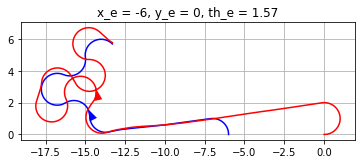

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xe, ye, c = 'b')
#ax.legend()
ax.plot(xp, yp, c = 'r')
#ax.legend()
axes=plt.gca()
axes.set_aspect('equal')
plt.arrow(xp[len(xp)//2], yp[len(yp)//2],xp[len(xp)//2+3]-xp[len(xp)//2] ,yp[len(yp)//2+3]-yp[len(yp)//2] , shape='full', lw=0, length_includes_head=True, head_width=.5, color='r')
plt.arrow(xe[len(xe)//2], ye[len(ye)//2],xe[len(xe)//2+3]-xe[len(xe)//2] ,ye[len(ye)//2+3]-ye[len(ye)//2] , shape='full', lw=0, length_includes_head=True, head_width=.5, color='b')

axes.set(title="x_e = " + str(x_e0) + ", y_e = " + str(y_e0) + ", th_e = " + str(round(th_e0,2)))
plt.grid()

#plt.figure(figsize=(5, 5))
plt.savefig("D:\\Julia\\data\\newImages\\twoCar6.pdf",pad_inches=0.1,bbox_inches='tight')